<a href="https://colab.research.google.com/github/abitarafan/Intro-DataScience-21/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
housing_data = pd.read_csv("housing.data", delim_whitespace=True, header=None)

Chicking the initial load

In [ ]:
housing_data.head()

Testing for null values

In [ ]:
housing_data.isnull().sum()

Using train_test_split method from sklearn to easily split train and test dataset.

The training is meant to predict the MEDV of owner occupied houses with index of 13.

In [8]:
housing_features = housing_data.copy()
housing_target = housing_features.pop(13)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(housing_features, housing_target, test_size=0.2)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2)

In [ ]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)
Xval = scaler.transform(Xval)

In [9]:
model = Sequential([Dense(30, activation='relu', input_shape= Xtrain.shape[1:]), Dense(1)])

In [ ]:
model.summary()

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
history = model.fit(Xtrain, Ytrain, validation_data=(Xval, Yval), epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 20ms/step - loss: 31.4366 - val_loss: 44.5907
Epoch 2/100
11/11 [==============================] - 0s 17ms/step - loss: 28.9200 - val_loss: 49.5747
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 31.6353 - val_loss: 46.8625
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 29.8757 - val_loss: 50.5475
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 30.3132 - val_loss: 44.2486
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 28.4591 - val_loss: 43.6124
Epoch 7/100
11/11 [==============================] - 0s 17ms/step - loss: 28.7331 - val_loss: 43.4397
Epoch 8/100
11/11 [==============================] - 0s 16ms/step - loss: 30.2985 - val_loss: 43.4057
Epoch 9/100
11/11 [==============================] - 0s 15ms/step - loss: 28.3969 - val_loss: 43.5601
Epoch 10/100
11/11 [==============================] - 0s 10ms/step - loss: 29.2303 -

In [16]:
model.save('Sequential.h5')

Evaluation of the model

In [24]:
test_model = model.evaluate(Xtest, Ytest)
test_model

4/4 [==============================] - 0s 4ms/step - loss: 40.6099


40.60994338989258

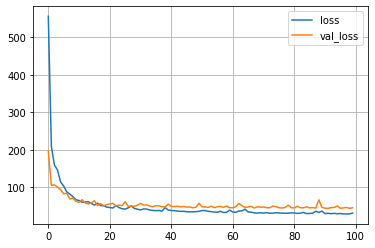

In [22]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()